# Re-design codebook for CTP14 part2
including promoters, enhancers and super-enhancers

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia

print(os.getpid())

# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

2832


In [3]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\human\hg38'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
if not os.path.exists(pool_folder):
    print(f"Create pool_folder: {pool_folder}")
    os.makedirs(pool_folder)
else:
    print(f"Use pool_folder: {pool_folder}")
    
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'human_brain_promoter_enhancer_v2')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
else:
    print(f"Use library_folder: {library_folder}")
    
# save encoding for now
encoding_folder = os.path.join(library_folder, 'Encoding_design')
if not os.path.exists(encoding_folder):
    print(f"Create encoding_folder: {encoding_folder}")
    os.makedirs(encoding_folder)
else:
    print(f"Use encoding_folder: {encoding_folder}")


Use pool_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain
Use library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2
Use encoding_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2\Encoding_design


# 1. Load designed Hamming codes

210

In [62]:
num_bits = 114
on_bits = 3
# savefile
encoding_filename = os.path.join(encoding_folder, f'encoding_bits_total-{num_bits}_on-{on_bits}.pkl')
print(f"Encoding: {encoding_filename}")
encoding_bits = pickle.load(open(encoding_filename, 'rb'))

Encoding: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2\Encoding_design\encoding_bits_total-114_on-3.pkl


In [63]:
len(encoding_bits)

1875

In [64]:
chr_region_num_filename = os.path.join(library_folder, 'chr_2_final_region_num.pkl')
print(chr_region_num_filename)
chr_2_region_num = pickle.load( open(chr_region_num_filename, 'rb'))

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2\chr_2_final_region_num.pkl


In [65]:
# assign into different chromosomes
distance_order = 2
cand_bits = list(encoding_bits)
total_bit_usage = np.zeros(np.max(cand_bits)+1)
chr_bit_usage_dict = {}
chr_2_region_bits = {}
for _chr, _num in sorted(chr_2_region_num.items(), key=lambda v:-v[1]):
    print(_chr, _num)
    chr_2_region_bits[_chr] = []
    # try to assign as even as possible for this chr
    _chr_bit_usage = np.zeros(np.max(cand_bits)+1)
    
    while len(chr_2_region_bits[_chr]) < _num:
        # for each cand_bit, estimate overlap
        _chr_usage_list = [np.linalg.norm(_chr_bit_usage[_bits]) for _bits in cand_bits]
        _total_usage_list = [np.linalg.norm(total_bit_usage[_bits]) for _bits in cand_bits]
        # find the least overlapping candidate
        _least_overlap_inds = []
        _chr_usage_th = np.min(_chr_usage_list)
        _total_usage_th = np.min(_total_usage_list)
        while len(_least_overlap_inds) == 0:
            _least_overlap_inds = np.intersect1d(np.where(np.array(_chr_usage_list)<=_chr_usage_th)[0], 
                                                np.where(np.array(_total_usage_list)<=_total_usage_th)[0])
            _total_usage_th += 1
        # randomly select
        _rand_least_overlap_ind = _least_overlap_inds[np.random.randint(len(_least_overlap_inds))]
        # select the least picked bits
        
        
        print(_chr_bit_usage[cand_bits[_rand_least_overlap_ind]], 
              total_bit_usage[cand_bits[_rand_least_overlap_ind]],  
              cand_bits[_rand_least_overlap_ind],
              )
        
        
        # remove this code from cand_bit pool
        _sel_cand = cand_bits.pop(_rand_least_overlap_ind)


        # update overlap list and chr_2_region_bits
        chr_2_region_bits[_chr].append(_sel_cand)
        _chr_bit_usage[_sel_cand] += 1
        total_bit_usage[_sel_cand] += 1
    
    chr_bit_usage_dict[_chr] = _chr_bit_usage

1 130
[0. 0. 0.] [0. 0. 0.] [58 91 92]
[0. 0. 0.] [0. 0. 0.] [40 66 68]
[0. 0. 0.] [0. 0. 0.] [63 89 95]
[0. 0. 0.] [0. 0. 0.] [ 39  94 105]
[0. 0. 0.] [0. 0. 0.] [ 38  99 113]
[0. 0. 0.] [0. 0. 0.] [47 74 97]
[0. 0. 0.] [0. 0. 0.] [ 48  88 102]
[0. 0. 0.] [0. 0. 0.] [54 82 90]
[0. 0. 0.] [0. 0. 0.] [ 9 41 49]
[0. 0. 0.] [0. 0. 0.] [ 27  73 106]
[0. 0. 0.] [0. 0. 0.] [14 18 28]
[0. 0. 0.] [0. 0. 0.] [  1 109 112]
[0. 0. 0.] [0. 0. 0.] [0 3 5]
[0. 0. 0.] [0. 0. 0.] [ 24  80 108]
[0. 0. 0.] [0. 0. 0.] [ 2 17 20]
[0. 0. 0.] [0. 0. 0.] [10 93 98]
[0. 0. 0.] [0. 0. 0.] [ 7 55 69]
[0. 0. 0.] [0. 0. 0.] [16 61 67]
[0. 0. 0.] [0. 0. 0.] [12 52 70]
[0. 0. 0.] [0. 0. 0.] [19 50 65]
[0. 0. 0.] [0. 0. 0.] [34 53 56]
[0. 0. 0.] [0. 0. 0.] [31 43 44]
[0. 0. 0.] [0. 0. 0.] [15 32 42]
[0. 0. 0.] [0. 0. 0.] [23 83 84]
[0. 0. 0.] [0. 0. 0.] [ 64 101 111]
[0. 0. 0.] [0. 0. 0.] [ 21  96 100]
[0. 0. 0.] [0. 0. 0.] [22 36 45]
[0. 0. 0.] [0. 0. 0.] [ 4 57 72]
[0. 0. 0.] [0. 0. 0.] [ 8 76 87]
[0. 0. 0.] [0. 0

[0. 0. 0.] [6. 6. 6.] [ 28  75 102]
[0. 0. 0.] [6. 6. 6.] [10 49 62]
[0. 0. 0.] [6. 6. 6.] [63 90 93]
[0. 0. 0.] [6. 6. 6.] [ 2 87 98]
[0. 0. 0.] [6. 6. 6.] [15 59 80]
[0. 0. 0.] [6. 6. 6.] [23 37 38]
[0. 0. 0.] [6. 6. 6.] [ 40  79 100]
[0. 0. 0.] [6. 6. 6.] [61 84 88]
[0. 0. 0.] [6. 6. 6.] [ 8 39 54]
[0. 0. 0.] [6. 6. 6.] [ 36 110 112]
[0. 0. 0.] [6. 6. 6.] [29 67 86]
[0. 0. 0.] [6. 6. 6.] [35 94 96]
[0. 0. 0.] [6. 6. 6.] [31 50 60]
[0. 0. 0.] [6. 6. 6.] [48 74 82]
[0. 0. 0.] [6. 6. 6.] [44 72 92]
[0. 0. 0.] [6. 6. 6.] [16 65 70]
[0. 0. 0.] [6. 6. 6.] [14 25 26]
[0. 0. 0.] [6. 7. 6.] [33 69 91]
[0. 0. 0.] [6. 7. 6.] [ 0  9 12]
[0. 0. 0.] [7. 6. 6.] [  4  83 107]
[0. 0. 0.] [6. 7. 6.] [ 18  81 109]
[0. 0. 0.] [7. 7. 6.] [19 95 97]
[0. 0. 0.] [6. 7. 7.] [ 22 104 105]
[0. 0. 0.] [6. 7. 7.] [ 6 42 43]
[0. 0. 0.] [7. 6. 7.] [ 24 101 113]
[0. 0. 0.] [7. 7. 7.] [34 51 52]
[0. 0. 0.] [7. 7. 7.] [20 46 55]
[0. 0. 0.] [7. 7. 7.] [21 47 56]
[0. 0. 0.] [7. 7. 7.] [32 57 78]
[0. 0. 0.] [7. 7. 7.] 

[1. 1. 1.] [12. 12. 12.] [32 48 53]
[1. 1. 1.] [12. 12. 12.] [40 70 89]
[1. 1. 1.] [12. 12. 12.] [ 43  75 107]
[1. 1. 1.] [12. 12. 12.] [27 88 95]
[1. 1. 1.] [12. 12. 12.] [  6  92 102]
[1. 1. 1.] [12. 12. 12.] [20 33 38]
[1. 1. 1.] [12. 12. 12.] [13 51 66]
[1. 1. 1.] [12. 12. 12.] [ 5 45 65]
[1. 1. 1.] [12. 12. 12.] [ 7 77 99]
[1. 1. 1.] [12. 12. 12.] [ 3 17 22]
[1. 1. 1.] [12. 12. 13.] [52 85 91]
[1. 1. 1.] [12. 13. 12.] [23 60 71]
[1. 1. 1.] [13. 12. 12.] [ 47  98 111]
[1. 1. 1.] [13. 12. 12.] [31 81 82]
[1. 1. 1.] [12. 12. 13.] [18 36 49]
[1. 1. 1.] [13. 12. 13.] [ 37  97 101]
[1. 1. 1.] [13. 13. 13.] [ 59  86 100]
[1. 1. 1.] [13. 13. 13.] [ 8 41 50]
[1. 1. 1.] [13. 13. 13.] [ 0 55 61]
[1. 1. 1.] [13. 13. 13.] [ 4 62 80]
[1. 1. 1.] [13. 13. 13.] [24 68 83]
[1. 1. 1.] [13. 13. 13.] [30 84 94]
[1. 1. 1.] [13. 13. 13.] [ 46 105 110]
[1. 1. 1.] [13. 13. 13.] [26 54 58]
[1. 1. 1.] [13. 13. 13.] [44 73 93]
[1. 1. 1.] [13. 13. 13.] [  9 112 113]
[1. 1. 1.] [13. 13. 13.] [42 63 78]
[1. 1. 

[0. 0. 0.] [18. 18. 18.] [25 37 55]
[0. 0. 0.] [18. 18. 18.] [16 62 69]
[0. 0. 0.] [18. 18. 18.] [44 79 88]
[0. 0. 0.] [18. 18. 18.] [12 18 19]
[0. 0. 0.] [18. 18. 18.] [10 66 94]
[0. 0. 0.] [18. 18. 18.] [ 36  86 104]
[0. 0. 0.] [18. 18. 18.] [33 54 63]
[0. 0. 0.] [18. 18. 18.] [ 6 64 82]
[0. 0. 0.] [18. 18. 18.] [ 23  87 113]
[0. 0. 0.] [18. 18. 18.] [29 43 47]
[0. 0. 0.] [18. 18. 18.] [13 26 34]
[0. 0. 0.] [18. 18. 18.] [42 92 93]
[0. 0. 0.] [18. 18. 18.] [14 38 56]
[0. 0. 0.] [18. 18. 18.] [ 45 105 112]
[0. 0. 0.] [18. 18. 18.] [40 57 59]
[0. 0. 0.] [18. 18. 18.] [ 21 107 108]
[0. 0. 0.] [19. 18. 18.] [ 2 30 39]
[0. 0. 0.] [18. 18. 19.] [ 8 35 48]
[0. 0. 0.] [18. 19. 19.] [15 75 77]
[0. 0. 0.] [19. 19. 18.] [49 81 89]
[0. 0. 0.] [19. 18. 19.] [ 5 31 32]
[0. 0. 0.] [19. 19. 18.] [ 52 102 110]
[0. 0. 0.] [19. 19. 19.] [ 1 41 61]
[0. 0. 0.] [19. 19. 19.] [ 28  91 109]
[0. 0. 0.] [19. 19. 19.] [ 4 70 78]
[0. 0. 0.] [19. 19. 19.] [22 83 90]
[0. 1. 0.] [18. 19. 19.] [11 21 24]
[1. 0. 0.]

[0. 1. 0.] [24. 24. 24.] [ 10  76 110]
[0. 1. 0.] [24. 24. 24.] [40 87 91]
[0. 0. 1.] [24. 24. 25.] [ 1 67 70]
[1. 0. 1.] [24. 24. 24.] [ 4 34 46]
[0. 1. 1.] [24. 24. 24.] [29 54 66]
[1. 1. 1.] [24. 24. 24.] [ 27  81 100]
[1. 1. 1.] [24. 24. 24.] [50 71 94]
[1. 1. 1.] [24. 24. 24.] [ 9 22 23]
[1. 1. 1.] [24. 24. 24.] [18 59 73]
[1. 1. 1.] [24. 24. 24.] [ 6 15 21]
[1. 1. 1.] [24. 24. 24.] [  0  79 107]
[1. 1. 1.] [24. 24. 24.] [55 83 95]
[1. 1. 1.] [25. 24. 24.] [ 10 105 113]
[1. 1. 1.] [24. 25. 24.] [ 31 104 108]
[1. 1. 1.] [25. 24. 24.] [ 5 82 97]
[1. 1. 1.] [24. 24. 25.] [25 51 57]
[1. 1. 1.] [24. 25. 24.] [ 42 101 112]
[1. 1. 1.] [24. 25. 24.] [19 69 74]
[1. 1. 1.] [25. 25. 24.] [ 17  75 103]
[1. 1. 1.] [25. 25. 24.] [ 58  90 102]
[1. 1. 1.] [25. 25. 24.] [11 92 96]
[1. 1. 1.] [25. 25. 24.] [24 44 63]
[1. 1. 1.] [25. 25. 25.] [45 64 78]
[1. 1. 1.] [25. 25. 25.] [ 8 47 61]
[1. 1. 1.] [25. 25. 25.] [37 80 84]
9 60
[0. 0. 0.] [25. 25. 25.] [14 49 51]
[0. 0. 0.] [25. 25. 25.] [20 54 59]

[0. 0. 1.] [30. 30. 30.] [ 5 26 28]
[0. 0. 1.] [30. 30. 31.] [ 2 42 59]
[1. 0. 1.] [30. 30. 30.] [ 47  93 110]
[1. 0. 1.] [30. 30. 30.] [30 60 74]
[1. 0. 1.] [30. 30. 30.] [ 20  96 112]
[1. 1. 1.] [30. 30. 30.] [55 78 82]
[1. 1. 1.] [30. 30. 30.] [35 83 87]
[1. 1. 1.] [30. 30. 30.] [32 54 71]
14 41
[0. 0. 0.] [30. 30. 30.] [ 8 72 88]
[0. 0. 0.] [30. 30. 30.] [23 40 58]
[0. 0. 0.] [30. 30. 30.] [37 69 92]
[0. 0. 0.] [30. 30. 30.] [ 65  97 109]
[0. 0. 0.] [30. 30. 30.] [ 67  99 100]
[0. 0. 0.] [30. 30. 30.] [ 14  91 113]
[0. 0. 0.] [30. 30. 30.] [27 62 68]
[0. 0. 0.] [30. 30. 31.] [ 4 75 79]
[0. 0. 0.] [30. 30. 31.] [10 46 47]
[0. 0. 0.] [30. 31. 30.] [ 6 35 36]
[0. 0. 0.] [30. 31. 30.] [21 32 38]
[0. 0. 0.] [30. 31. 30.] [ 9 53 73]
[0. 0. 0.] [31. 30. 30.] [26 44 61]
[0. 0. 0.] [31. 30. 30.] [ 60  85 107]
[0. 0. 0.] [31. 30. 30.] [ 18 106 108]
[0. 0. 0.] [30. 31. 31.] [12 31 39]
[0. 0. 0.] [31. 31. 30.] [ 13  86 102]
[0. 0. 0.] [30. 31. 31.] [56 78 80]
[0. 0. 0.] [31. 31. 30.] [ 7 43 45

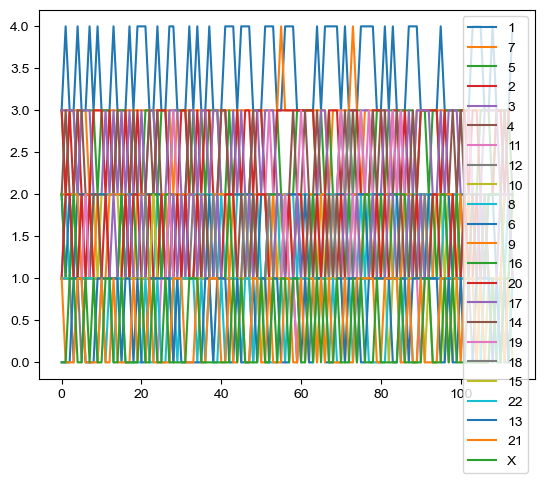

In [66]:
fig, ax = plt.subplots()
for _chr, _chr_bit_usage in chr_bit_usage_dict.items():
    ax.plot(_chr_bit_usage, label=_chr, )
    
ax.legend()

(0.0, 38.0)

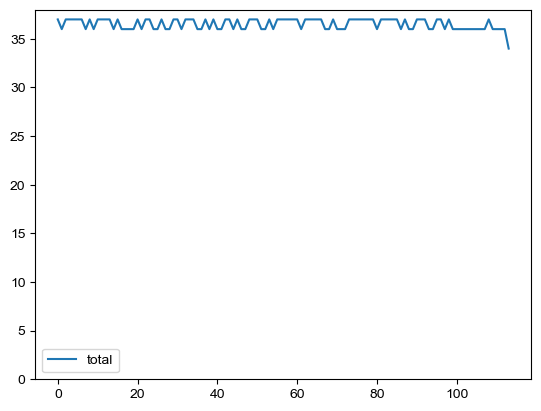

In [67]:
fig, ax = plt.subplots()
ax.plot(total_bit_usage, label='total', )
    
ax.legend()
ax.set_ylim(0, np.max(total_bit_usage)+1)

# Sort bits along chromosomes

In [68]:
def calculate_closest_overlap(code_list, code, _localtion):
    """Calculate the closest neighbor of certain code at certain location"""
    if _localtion > len(code_list) or _localtion < 0:
        raise ValueError(f"invalid _location")
    _code_list = np.array(code_list)
    if len(_code_list) == 0:
        return np.inf
    else:
        _min_dists = []
        for _c in code:
            if not (_code_list==_c).any():
                _min_dists.append(len(code_list)+1)
            else:
                _match_loc,_  = np.where(_code_list == _c)
                _dists = np.abs(_match_loc - _localtion)
                _dists[_match_loc >= _localtion] += 1
                _min_dists.append(np.min(_dists))
        #print(_min_dists)
    return np.nanmin(_min_dists).astype(np.float64)

In [69]:
sorted_chr_bits = {}
sorted_chr_dists = {}
for _chr, _chr_bits in chr_bit_usage_dict.items():
    print('Chr', _chr)
    _chr_bits = np.array(chr_2_region_bits[_chr])
    code_degrees = np.array([np.sum(chr_bit_usage_dict[_chr][_b])-3 for _b in _chr_bits])

    final_codes = []
    final_dist = 0

    # it seems the random doesnt help
    for _iter in range(100):
        ordered_codes = []
        #ordered_codes = [tuple(_c) for _c in _chr_bits[np.where(code_degrees==np.min(code_degrees))]]
        #random.shuffle(ordered_codes)
        #for _degree in np.unique(code_degrees)[1:]:
        for _degree in np.unique(code_degrees):
            _cand_codes = [tuple(_c) for _c in _chr_bits[np.where(code_degrees==_degree)]]
            #print(_cand_codes, len(_cand_codes))
            #random.shuffle(_cand_codes)
            #print(_cand_codes, len(_cand_codes))
            for _code in _cand_codes:
                _dists = []
                for _i in range(0, len(ordered_codes)+1):
                    _dists.append(calculate_closest_overlap(ordered_codes, _code, _i))
                ordered_codes.insert(np.argmax(_dists), _code)
                #print(_dists, np.argmax(_dists))

        # check order
        final_dists = []
        for _i, _code in enumerate(ordered_codes):
            _other_codes = [_c for _j, _c in enumerate(ordered_codes) if _i != _j]
            final_dists.append(calculate_closest_overlap(_other_codes, _code, _i))
        if min(final_dists) > final_dist:
            final_dist = np.nanmin(final_dists)
            final_codes = [np.array(_c) for _c in ordered_codes]
            print('min dist:', final_dist, 'change')
        
        #break
    sorted_chr_bits[_chr] = np.array(final_codes)
    sorted_chr_dists[_chr] = np.array(final_dists)

Chr 1
min dist: 12.0 change
Chr 7
min dist: 7.0 change
Chr 5
min dist: 11.0 change
Chr 2
min dist: 10.0 change
Chr 3
min dist: 6.0 change
Chr 4
min dist: 12.0 change
Chr 11
min dist: 16.0 change
Chr 12
min dist: 5.0 change
Chr 10
min dist: 13.0 change
Chr 8
min dist: 11.0 change
Chr 6
min dist: 13.0 change
Chr 9
min dist: 13.0 change
Chr 16
min dist: 15.0 change
Chr 20
min dist: 11.0 change
Chr 17
min dist: 16.0 change
Chr 14
min dist: 15.0 change
Chr 19
min dist: 33.0 change
Chr 18
min dist: 27.0 change
Chr 15
min dist: 33.0 change
Chr 22
min dist: 24.0 change
Chr 13
min dist: 21.0 change
Chr 21
min dist: 17.0 change
Chr X
min dist: 12.0 change


# region to bits

In [ ]:
chr_region_num_filename = os.path.join(library_folder, 'chr_2_final_region_num.pkl')
print(chr_region_num_filename)
chr_2_region_num = pickle.load( open(chr_region_num_filename, 'rb'))

In [71]:
# load
chr_region_name_filename = os.path.join(library_folder, 'chr_2_region_names.pkl')
print(chr_region_name_filename)

chr_2_region_names = pickle.load(open(chr_region_name_filename, 'rb'))

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_brain_promoter_enhancer_v2\chr_2_region_names.pkl


In [73]:
chr_2_region_names['1']

['hSE-0',
 'PRDM16',
 'PRDM16_enhancer-0',
 'PRDM16_enhancer-1',
 'PRDM16_enhancer-2',
 'PRDM16_enhancer-3',
 'PRDM16_enhancer-4',
 'hSE-1',
 'hSE-2',
 'hSE-3',
 'hSE-4',
 'hSE-5',
 'hSE-6',
 'hSE-7',
 'SRARP',
 'hSE-8',
 'hSE-9',
 'hSE-10',
 'C1QC',
 'C1QC_enhancer-5',
 'hSE-11',
 'ID3',
 'hSE-13',
 'CD52',
 'hSE-14',
 'PTPRU',
 'hSE-15',
 'PTPRU_enhancer-6',
 'hSE-16',
 'LAPTM5',
 'MARCKSL1',
 'hSE-17',
 'hSE-18',
 'hSE-19',
 'hSE-20',
 'CSF3R',
 'RSPO1',
 'POU3F1',
 'COL9A2',
 'hSE-21',
 'hSE-22',
 'hSE-23',
 'TAL1',
 'RAB3B',
 'ROR1',
 'ROR1_enhancer-7',
 'PTGER3',
 'hSE-25',
 'SLC44A5',
 'ST6GALNAC5',
 'IFI44L',
 'hSE-26',
 'hSE-27',
 'hSE-28',
 'COL24A1_enhancer-8',
 'COL24A1',
 'LMO4_enhancer-9',
 'LMO4',
 'hSE-29',
 'hSE-30',
 'F3',
 'F3_enhancer-10',
 'F3_enhancer-11',
 'F3_enhancer-12',
 'OLFM3_enhancer-13',
 'OLFM3_enhancer-14',
 'OLFM3_enhancer-15',
 'OLFM3_enhancer-16',
 'OLFM3_enhancer-17',
 'OLFM3_enhancer-18',
 'OLFM3_enhancer-19',
 'OLFM3',
 'OLFM3_enhancer-20',
 'FNDC

In [91]:
from ImageAnalysis3.structure_tools.distance import sort_chr

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 'X']

In [93]:
# map
# assemble to regionrate region_to_encoding_bits
region_2_bits = {}
for _chr in sorted(sorted_chr_bits, key=lambda _c: sort_chr(_c)):
    _chr_bits = sorted_chr_bits[_chr]
    _region_names = chr_2_region_names[_chr]
    print(_chr, len(_chr_bits), len(_region_names))
    region_2_bits.update({_g:_b for _g, _b in zip(_region_names, _chr_bits)})

1 130 130
2 96 96
3 94 94
4 84 84
5 100 100
6 63 63
7 112 112
8 63 63
9 60 60
10 63 63
11 79 79
12 74 74
13 21 21
14 41 41
15 34 34
16 51 51
17 46 46
18 37 37
19 38 38
20 49 49
21 17 17
22 24 24
X 12 12


In [95]:
# Save
pickle.dump(region_2_bits, open(os.path.join(encoding_folder, f'region_2_bits.pkl'), 'wb'))

In [96]:
len(region_2_bits)

1388

In [97]:
region_2_readout_dict = {}
for _iregion, _region in enumerate(region_2_bits):
    region_2_readout_dict[_region] = []#[f"u{_iregion}"]
    region_2_readout_dict[_region].extend([f"c{_b}" for _b in region_2_bits[_region]])

# save
pickle.dump(region_2_readout_dict, open(os.path.join(library_folder, 'region_2_readout.pkl'), 'wb'))